In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import tensorflow as tf
import tensorflow
from tensorflow import keras

Generate training and validation datasets

In [2]:
img_size = 160
batch_size = 16
path = 'Monkeys'

train_data = tf.keras.utils.image_dataset_from_directory(path, validation_split=0.2, subset="training", seed=123, image_size=(img_size,img_size), batch_size=batch_size)
val_data = tf.keras.utils.image_dataset_from_directory(path, validation_split=0.2, subset="validation", seed=123, image_size=(img_size,img_size), batch_size=batch_size)

Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


Visualize a snippet of the training dataset

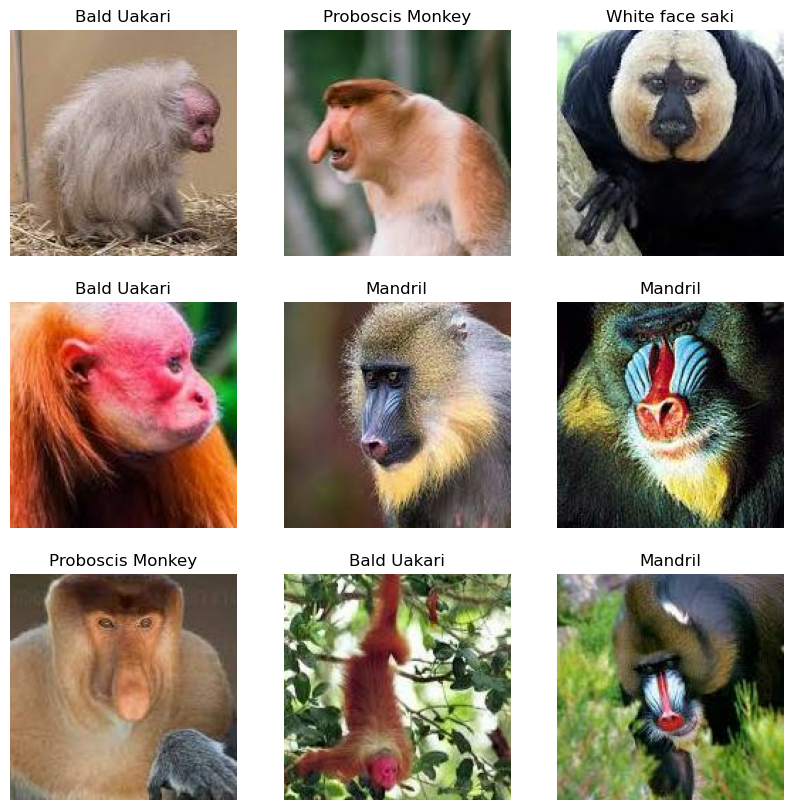

In [3]:
class_names = train_data.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Rescale the images

In [4]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

Use MobileNet V2 model

In [5]:
IMG_SHAPE = (img_size,img_size) + (3,)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE, weights="imagenet"
)
base_model.trainable = False

Check out the base model

In [6]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

Make model

In [7]:
inputs = tf.keras.Input(shape=(img_size,img_size,3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(5)(x)
model = tf.keras.Model(inputs, outputs)

In [8]:
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                             

In [10]:
history = model.fit(train_data,
                    epochs=20,
                    validation_data=val_data)

Epoch 1/20
25/25 [==============================] - 8s 163ms/step - loss: 1.5308 - accuracy: 0.5775 - val_loss: 1.4467 - val_accuracy: 0.8300
Epoch 2/20
25/25 [==============================] - 3s 105ms/step - loss: 1.3821 - accuracy: 0.7350 - val_loss: 1.3007 - val_accuracy: 0.8300
Epoch 3/20
25/25 [==============================] - 3s 111ms/step - loss: 1.2727 - accuracy: 0.7750 - val_loss: 1.1861 - val_accuracy: 0.8300
Epoch 4/20
25/25 [==============================] - 3s 101ms/step - loss: 1.1630 - accuracy: 0.8075 - val_loss: 1.0850 - val_accuracy: 0.8600
Epoch 5/20
25/25 [==============================] - 3s 104ms/step - loss: 1.0977 - accuracy: 0.8050 - val_loss: 1.0023 - val_accuracy: 0.8800
Epoch 6/20
25/25 [==============================] - 3s 109ms/step - loss: 1.0086 - accuracy: 0.7975 - val_loss: 0.9316 - val_accuracy: 0.8900
Epoch 7/20
25/25 [==============================] - 3s 109ms/step - loss: 0.9409 - accuracy: 0.8350 - val_loss: 0.8721 - val_accuracy: 0.8900
Epoch 

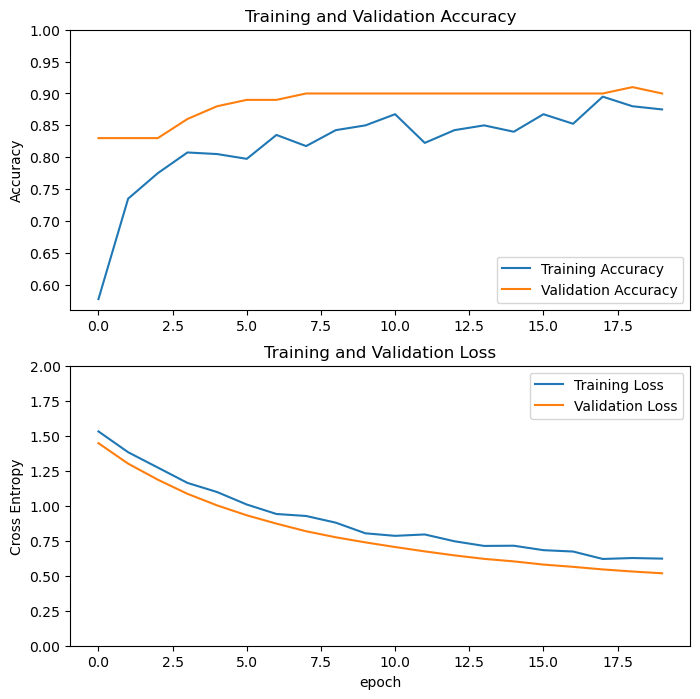

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Acknowledgement: I referenced https://www.tensorflow.org/tutorials/images/transfer_learning#compile_the_model when doing this on my Kaggle dataset (from https://www.kaggle.com/datasets/sarasnchez/monkeys).